# Convolution in image processing

## What is convolution?

No processamento de imagem, convolução é um processo de aplicar uma matrix (matrix de convolução) a uma imagem para transforma-la.

A matrix é aplicada como um produto interno a cada pedaço da imagem. Esse processo percorre toda imagem.

![img](http://deeplearning.net/software/theano/_images/numerical_padding_strides.gif)


In [61]:
import numpy as np
from matplotlib import pyplot as plt
from mnist import MNIST

Vamos aplicar a matriz de convolução identidade em uma imagem ára ver o resultadoVamos fazer o pading da imagem para poder aplicar a matriz em toda imagem.

o pading é incluir uma borda co 0 na imagem

In [62]:
mnist = MNIST('datasets/mnist')
train_images, train_labels = mnist.load_training()
test_images, test_labels = mnist.load_testing()

shape = (28,28)

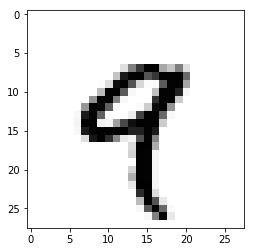

In [63]:
list_ex = train_images[4]
img_ex = np.matrix(list_ex).reshape(shape)
plt.imshow(img_ex, cmap='Greys')

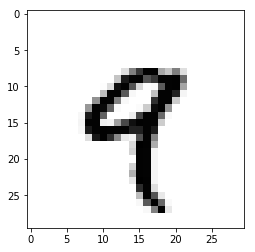

In [67]:
#Pading de 2
padding_img = np.zeros((shape[0]+2,shape[1]+2))
padding_img[1:-1,1:-1] = img_ex
plt.imshow(padding_img, cmap='Greys')

Vamos primeiro aplicar a matriz de convolução identidade

In [107]:
i_conv_matrix = np.matrix([
    [0.0,0.0,0.0],
    [0.0,1.0,0.0],
    [0.0,0.0,0.0]
])

In [112]:
def conv(conv_mat,img):

    result = np.zeros(shape)
    conv_op = conv_mat.reshape(9).tolist()[0]
    for i in range(shape[0]):
        for j in range(shape[1]):
            image_section = img[i:i+3,j:j+3]
            sec_reshaped = image_section.reshape(9)
            result[i,j] = np.dot(sec_reshaped,conv_op)
    return result

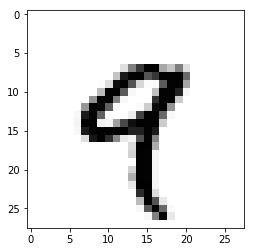

In [114]:
r = conv(i_conv_matrix, padding_img)
plt.imshow(r,cmap='Greys')

Vamos ver agora uma matriz de detecção de bordas

In [142]:
 plt.subplots?

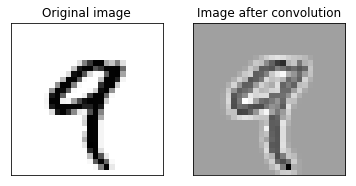

In [145]:
conv_edge = np.matrix([
    [-1.0,-1.0,-1.0],
    [-1.0,8.0,-1.0],
    [-1.0,-1.0,-1.0]
])
r = conv(conv_edge, padding_img)

f, axarr = plt.subplots(nrows=1, ncols=2)


f.subplots_adjust(hspace=0.5)

axarr[0].imshow(img_ex,cmap='Greys')
axarr[0].set_title("Original image")

axarr[0].axes.get_xaxis().set_visible(False)
axarr[0].axes.get_yaxis().set_visible(False)

axarr[1].imshow(r,cmap='Greys')
axarr[1].set_title("Image after convolution")

axarr[1].axes.get_xaxis().set_visible(False)
axarr[1].axes.get_yaxis().set_visible(False)



Vamos aplicar um filtro de normalização

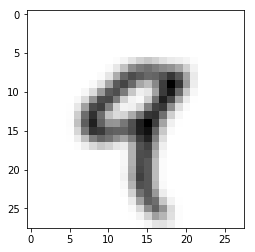

In [119]:
conv_edge = np.matrix([
    [1.0/9.0,1.0/9.0,1.0/9.0],
    [1.0/9.0,1.0/9.0,1.0/9.0],
    [1.0/9.0,1.0/9.0,1.0/9.0]
])
r = conv(conv_edge, padding_img)
plt.imshow(r,cmap='Greys')